# Exercise 3: Morphology and Syntax [SOLUTIONS]

This session is based on lectures 6 and 7 on Morphological Processing and Syntactic Parsing.



## Ex.1 Context Free Grammars (CFG)
### Practice with CFGs
*Note: This paper-only part is optional, and meant as a refresher for CFGs if you are not entirely familiar with them yet. You can skip ahead to the following exercise `Implementing CFGs` if you feel comfortable.*

Consider the following context-free grammar:

  \begin{align*}
    S & \rightarrow & NP ~ ~ VP\\
    NP & \rightarrow & (D) ~ ~ NOM\\
    VP & \rightarrow & V ~ ~ (NP) ~ ~ (NP)\\
    NOM & \rightarrow & N\\
    NOM & \rightarrow & NOM ~ ~ PP\\
    VP & \rightarrow & VP ~ ~ PP\\
    PP & \rightarrow & P ~ ~ NP\\
    X & \rightarrow & X^{+} ~ ~ CONJ ~ ~ X
  \end{align*}

and the following lexicon:

  \begin{align*}
    D & \rightarrow & a, the\\
    N & \rightarrow & woman, child, dog, book, couch, banana\\
    V & \rightarrow & reads, eats, sleeps, looked\\
    P & \rightarrow & on, at\\
    CONJ & \rightarrow & and, or\\
  \end{align*}

Note: $X^{+}$ here allows for recursion (eg. the woman, the child, the dog and the book on the couch)

#### Exercises:

1. Give three well-formed English sentences that the grammar allows. Draw the tree structures that the grammar assigns to them.
2. Give a well-formed English sentence that is structurally ambiguous according to the grammar. Draw the two distinct tree structures.  
3. Give one sentence that the grammar does not allow, but which is nonetheless a well-formed English sentence.
4. Give three sentences which the grammar allows, but which are not well-formed English sentences.
5. How could you adapt the grammar so that your sentence in (3) is allowed by it? How could you adapt your grammar so that your sentences in (4) are excluded?


    

In [ ]:
import nltk
from nltk.draw.tree import draw_trees

!pip install -q svgling
import svgling
from IPython.display import display

In [ ]:
grammar = nltk.CFG.fromstring("""
   S -> NP VP
   S -> S Conj S
   NP -> Det NOM | NOM
   NP -> NP Conj NP
   VP -> V NP | V NP NP | V
   VP -> VP PP
   VP -> VP Conj VP
   NOM -> N
   NOM -> NOM PP
   NOM -> NOM Conj NOM
   PP -> P NP
   PP -> PP Conj PP
   N -> "woman" | "child" | "dog" | "book" | "couch" | "banana"
   V -> "eats" | "reads" | "sleeps" | "looked"
   P -> "on" | "at"
   Det -> "a" | "the"
   Conj -> "and" | "or"
   """)
parser = nltk.ChartParser(grammar)

1. Well-formed sentences allowed by the grammar:

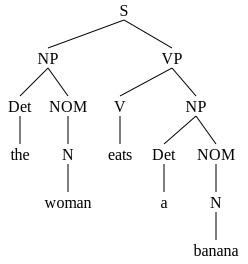

In [ ]:
sentence = "the woman eats a banana".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

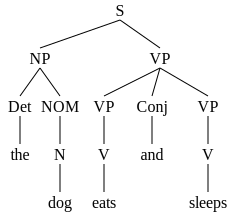

In [ ]:
sentence = "the dog eats and sleeps".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

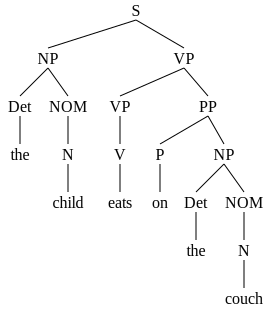

In [ ]:
sentence = "the child eats on the couch".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

2. Structurally ambiguous sentence

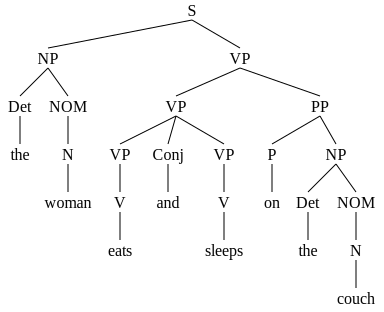

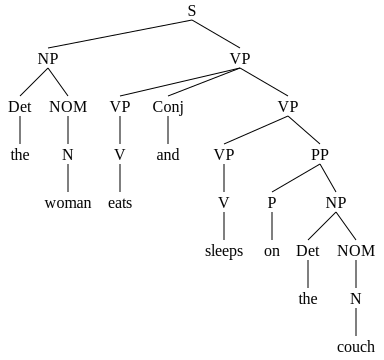

In [ ]:
sentence = "the woman eats and sleeps on the couch".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

3. Well-formed sentence the grammar does not allow

In [ ]:
sentence = "on the couch the child sleeps".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

4. Not-well formed sentences the grammar allows

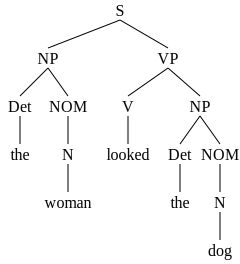

In [ ]:
sentence = "the woman looked the dog".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

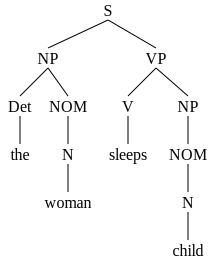

In [ ]:
sentence = "the woman sleeps child".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

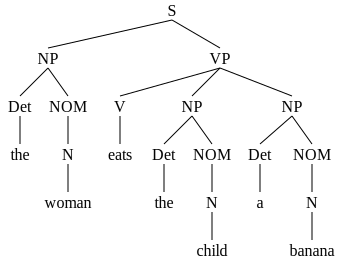

In [ ]:
sentence = "the woman eats the child a banana".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

Adapting the grammar to allow for (3) and exclude (4)

In [ ]:
grammar = nltk.CFG.fromstring("""
   S -> NP VP | PP NP VP
   S -> S Conj S
   NP -> Det NOM | NOM
   NP -> NP Conj NP
   VP -> IV | IV PP | TV NP | TV NP PP | DTV NP NP | DTV NP NP PP | DTV NP PP
   VP -> VP Conj VP
   NOM -> N
   NOM -> NOM PP
   NOM -> NOM Conj NOM
   PP -> P NP
   PP -> PP Conj PP
   N -> "woman" | "child" | "dog" | "book" | "couch" | "banana"
   TV -> "eats"
   IV -> "sleeps" | "looked"
   DTV -> "reads"
   P -> "on" | "at"
   Det -> "a" | "the"
   Conj -> "and" | "or"
   """)
parser = nltk.ChartParser(grammar)

# To include (3): Add rule that allows for a sentence to start with PP

# To exclude (4) : Split V into:
# transitive verbs (TV) requiring a direct object
# intransitive verbs that can take a prepositional phrase (IV)
# ditransitive verbs that can take 2 objects


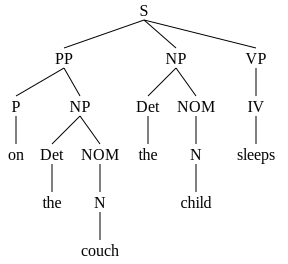

In [ ]:
sentence = "on the couch the child sleeps".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

In [ ]:
sentence = "the woman looked the dog".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

In [ ]:
sentence = "the woman sleeps child".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

In [ ]:
sentence = "the woman eats the child a banana".split()
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

### Implementing CFGs

In this exercise, we will implement a small fragment of context free grammar, and see how we can use it to parse sentences. For this exercise, we'll make use of the module `nltk`. Import the module using the code below:

In [ ]:
import nltk
from nltk.draw.tree import draw_trees

Our initial CFG grammar consists of the following rules:

```
   S -> NP VP
   NP -> Det N | N
   VP -> V PP | V
   PP -> P NP
```

and the following lexicon:

```
   N -> "hamsters" | "wheels" | "people" | "ruins" | "building" | "children" |"ice-cream" | "professor" | "article" | "men" | "musketeers" | "king"
   V -> "run" | "like" | "fell" | "writes" | "became" | "hate"
   P -> "in"
   Det -> "all" | "many" | "some" | "every" | "each" | "an" | "three" | "one" | "the"
```

Note that the vertical bar (`|`) denotes a choice, i.e., an `NP` can be rewritten as `Det N` or as `N`. We can load our initial grammar using the following command:

In [ ]:
grammar = nltk.CFG.fromstring("""
   S -> NP VP
   NP -> Det N | N
   VP -> V PP | V
   PP -> P NP
   N -> "hamsters" | "wheels" | "people" | "ruins" | "building" | "children" |"ice-cream" | "professor" | "article" | "men" | "musketeers" | "king"
   V -> "run" | "like" | "fell" | "writes" | "became" | "hate"
   P -> "in"
   Det -> "all" | "many" | "some" | "every" | "each" | "an" | "three" | "one" | "the"
   """)

We'll equally define a parser, which parses a given input string based on the grammar we defined (and returns all of the possible parses):

In [ ]:
parser = nltk.ChartParser(grammar)

We can now use the parser to parse a given input string:

In [ ]:
sentence = "all hamsters run in wheels".split()
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP (Det all) (N hamsters))
  (VP (V run) (PP (P in) (NP (N wheels)))))


In [ ]:
!pip install -q svgling
import svgling
from IPython.display import display

We can now visualize the parse tree using the following command:


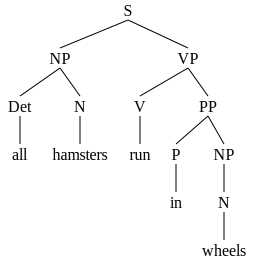

In [ ]:
for tree in parser.parse(sentence):
    display(svgling.draw_tree(tree))

**Exercises:**

Consider the following sentences:

```
    all hamsters run in wheels
    many people like linguistics
    every building fell in ruins
    some children hate ice-cream
    each professor writes an article
    three men became musketeers
    one man became the king
```


 1. Try to parse these sentences, and make sure they are adequately covered by the grammar. Adapt the grammar when necessary.

 Note: you can either adapt the grammar in the original code, or you can copy the original code and adapt it in the cell below. In any case, note that you will need to rerun both the command that defines the grammar (`nltk.CFG.fromstring`) and the command that defines the parser (`nltk.ChartParser`) in order to properly load your adapted grammar.


In [ ]:
# see full grammar below

 2. Try parsing the following ungrammatical sentence:

```
    * many people like
```    

> How can we mediate the grammar such that it prohibits this kind of ungrammatical sentences?

In [ ]:
grammar = nltk.CFG.fromstring("""
   S -> NP VP
   NP -> Det N | N
   VP -> IV | IV PP | TV NP | TV NP PP | DTV NP NP | DTV NP PP |
   PP -> P NP
   N -> "hamsters" | "wheels" | "people" | "ruins" | "building" | "children" |"ice-cream" | "professor" | "article" | "men" | "musketeers" | "king" | "linguistics" | "man" | "letters" | "she" | "her"
   IV -> "run" | "fell" |
   TV -> "like" | "writes" | "became" | "hate"
   DTV -> "writes"
   P -> "in" | "to"
   Det -> "all" | "many" | "some" | "every" | "each" | "an" | "three" | "one" | "the"
   """)

parser = nltk.ChartParser(grammar)

In [ ]:
sents = """
    all hamsters run in wheels.
    many people like linguistics.
    every building fell in ruins.
    some children hate ice-cream.
    each professor writes an article.
    three men became musketeers.
    one man became the king.
    """

for sentence in sents.split('.'):
  sentence = sentence.split()
  for tree in parser.parse(sentence):
      print(tree)

(S
  (NP (Det all) (N hamsters))
  (VP (IV run) (PP (P in) (NP (N wheels)))))
(S (NP (Det many) (N people)) (VP (TV like) (NP (N linguistics))))
(S
  (NP (Det every) (N building))
  (VP (IV fell) (PP (P in) (NP (N ruins)))))
(S (NP (Det some) (N children)) (VP (TV hate) (NP (N ice-cream))))
(S
  (NP (Det each) (N professor))
  (VP (TV writes) (NP (Det an) (N article))))
(S (NP (Det three) (N men)) (VP (TV became) (NP (N musketeers))))
(S (NP (Det one) (N man)) (VP (TV became) (NP (Det the) (N king))))


In [ ]:
sentence = "many people like".split()
for tree in parser.parse(sentence):
      print(tree)

## Ex.2 Graph-based Dependency Parsing

(Paper-only exercise)
[FOR SOLUTIONS SEE SLIDES PROVIDED ON TOLEDO]


Graph-based dependency parsers search through the space of possible trees for a given sentence for a tree (or trees) that maximises some score. Given a sentence $S$ we start by creating a graph $G$ which is a fully-connected, weighted, directed graph where the vertices are the input words and the directed edges represent all possible head-dependent assignments. We’ll include an additional ROOT node with outgoing edges directed at all of the other vertices. The weights of each edge in G reflect the score for each possible head-dependent relation assigned by some scoring algorithm.

The best dependency tree for $S$ is the **maximum spanning tree**, or the tree spanning over graph $G$, starting from the ROOT that is a subset of $G$ and covers all vertices in $G$ which has the maximum score.

To find such a tree, we can use the Chu and Liu and Edmonds algorithm (CLE). See a detailed explanation on pages 16 and 17 of Chapter 19 of the SLP textbook.



**Exercise**: Consider the following sentence:
> The cat sees the tree with the binoculars.

There is an ambiguity in the meaning of the sentence. We will create a dependency parse of this sentence from the following scores given by a model. Use the CLE algorithm to find the maximum spanning tree and find the optimum parse tree for the sentence. Which of the two possible meanings does this parse correspond to?

![image](https://github.com/LAGoM-NLP/NLP-data-repo/blob/0943f185400e47225bc8b04a23c07e57528f86e6/tree.png?raw=true)



If you are interested in learning about how to implement neural models that can be used to obtain the edge scores above, see this tutorial on biaffine graph-based dependency parsing: https://www.cse.chalmers.se/~richajo/nlp2019/l7/Biaffine%20dependency%20parsing.html

## Ex.3 Using spaCy

In this exercise we will introduce the spaCy library that is designed to implement natural language processing pipelines. It can be used to preprocess text with sentence segmentation, tokenization, lemmatization (as we have seen in earlier exercises). It is also very efficient in carrying out simple NLP tasks like POS tagging, NER, and dependency parsing. Let's install and import the package:

In [ ]:
!pip install -q spacy
import spacy

We will use spaCy to preprocess some English text (although it is available in many other languages). The library contains many trained models that have to be loaded before we can process anything. Let's load a model for English (you can also try others in : https://spacy.io/models/en):

In [ ]:
nlp = spacy.load("en_core_web_sm")

We can now process a string of characters using Spacy's preprocessing pipeline. The code below first puts a text string in the variable `text`; this string is then processed by Spacy's pipeline, such that the variable `doc` contains the text augmented with Spacy's annotations.

In [ ]:
text = "The cat sees the tree with the binoculars."
doc = nlp(text)
print(doc)
for token in doc:
  print(token.text, token.lemma_, token.pos_)

The cat sees the tree with the binoculars.
The the DET
cat cat NOUN
sees see VERB
the the DET
tree tree NOUN
with with ADP
the the DET
binoculars binocular NOUN
. . PUNCT


### Morphological Analysis

The spaCy module can be very useful for morphological analyses of text.

[Universal Dependencies (UD)](https://universaldependencies.org/) is a project for creating universal and comparable gold standard treebanks across languages. UD contains consistent linguistic annotations such as parts of speech, syntactic dependencies and morphological features. It has enabled much cross-lingual and multilingual NLP research.
UD contains sentences annotated with morphological tags that can be used for morphological analyses. We invite you to go through the [UD annotation guidelines](https://universaldependencies.org/u/overview/morphology.html) for morphologial annotations to understand what they look like. We will learn how to use these annotations with spaCy (based on https://spacy.io/usage/linguistic-features#morphology).



In [ ]:
for token in doc:
  print(token, token.morph)

The Definite=Def|PronType=Art
cat Number=Sing
sees Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
the Definite=Def|PronType=Art
tree Number=Sing
with 
the Definite=Def|PronType=Art
binoculars Number=Plur
. PunctType=Peri


In [ ]:
doc[0].morph.get('PronType') #get the 'PronType' for the 1st element in doc

['Art']

The [Morphologizer](https://spacy.io/api/morphologizer) is the pipeline component of spaCy that handles morphological tagging. It is trainable, which means that you can train it on your own morphologically tagged dataset to create your own custom morphological analyser. You can explore the documentation linked here for details if interested.

### Dependency Parsing



The spaCy module also contains a dependency parsing component that applies a transition-based parser to its trained statistical and neural models to generate dependency annotations. They can be accessed as follows:

In [ ]:
for token in doc:
  print(token.text, token.pos_, '<-', token.head, token.head.pos_, '(', token.dep_, ')', '| children: ',[child for child in token.children])

The DET <- cat NOUN ( det ) | children:  []
cat NOUN <- sees VERB ( nsubj ) | children:  [The]
sees VERB <- sees VERB ( ROOT ) | children:  [cat, tree, with, .]
the DET <- tree NOUN ( det ) | children:  []
tree NOUN <- sees VERB ( dobj ) | children:  [the]
with ADP <- sees VERB ( prep ) | children:  [binoculars]
the DET <- binoculars NOUN ( det ) | children:  []
binoculars NOUN <- with ADP ( pobj ) | children:  [the]
. PUNCT <- sees VERB ( punct ) | children:  []


You can use the `.explain` method to understand what each tag means:

In [ ]:
spacy.explain('PRP$')

'pronoun, possessive'

You can also visualise your dependency tree in a more human-readable format:

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style = 'dep', jupyter = True, options = {'distance': 90})

Each word can have only one head (only a single arrow can arrive at a word), but a word can have multiple dependents (multiple arrows can start from a word). The root of the sentence (the main verb) does not have a head.

You can use the syntactic annotation in order to search for syntactic constructions of interest. As an example, the code below finds nouns together with their determiners:

In [ ]:
det_nouns = []
for candidate in doc:
    if candidate.dep_ == 'det' and candidate.head.pos_ == 'NOUN':
        det_nouns.append((candidate, candidate.head))
print(det_nouns)

[(The, cat), (the, tree), (the, binoculars)]


**Exercise**: Load the dev set (en_ewt-ud-dev.conllu) of the [UD_English-EWT](https://github.com/UniversalDependencies/UD_English-EWT/tree/master) treebank and process the examples in spaCy.
>`!git clone https://github.com/UniversalDependencies/UD_English-EWT.git`

Tip: You can use the `pyconll` package (https://pyconll.readthedocs.io/en/latest/starting.html) to easily load and process conllu files.

Use the acquired annotations to find:
>a. All possible combinations of verbs and subjects in the data. Only extract the verb and the head noun of the subject. For example, in the sentence *the dog of the neighbours sleeps*, extract the tuple *(dog, sleeps)*.

>b. All instances where the ROOT of the sentence is not a verb.

>c. All combinations of verbs and adjectives in the data, where the adjective appears as modifier to the subject of the verb. As an example, in the sentence *the white dog sleeps*, extract the tuple *(white, sleeps)*.

Try the different English models available in the spaCy pipeline to get dependency parse trees for the same sentences. Do you see a difference?

OPTIONAL: If you speak another language, you can also try running a similar pipeline for a treebank from another language. Simply load a model for that language from https://spacy.io/models using `spacy.load()`. Links to all UD treebanks are in https://universaldependencies.org/.

In [ ]:
!pip install pyconll

In [ ]:
!git clone https://github.com/UniversalDependencies/UD_English-EWT.git

Cloning into 'UD_English-EWT'...
remote: Enumerating objects: 45788, done.
remote: Counting objects: 100% (16575/16575), done.
remote: Compressing objects: 100% (2879/2879), done.
remote: Total 45788 (delta 14577), reused 15278 (delta 13695), pack-reused 29213 (from 1)
Receiving objects: 100% (45788/45788), 340.62 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (40712/40712), done.


In [ ]:
import pyconll

In [ ]:
conll = pyconll.load_from_file("UD_English-EWT/en_ewt-ud-dev.conllu")
parses = []
for sent in conll:
    text = sent.text
    doc = nlp(text)
    parses.append(doc)

In [ ]:
tags = []
deps = []
for parse in parses:
  for token in parse:
    tags.append(token.pos_)
    deps.append(token.dep_)

In [ ]:
print(set(tags)) # get the names of the POS tags

{'NUM', 'ADJ', 'VERB', 'AUX', 'ADV', 'X', 'INTJ', 'PRON', 'NOUN', 'CCONJ', 'SCONJ', 'PROPN', 'ADP', 'PART', 'SYM', 'DET', 'PUNCT'}


In [ ]:
print(set(deps)) # get the names of the dependency labels

{'oprd', 'acl', 'dep', 'advmod', 'punct', 'conj', 'csubj', 'advcl', 'attr', 'amod', 'ccomp', 'neg', 'dobj', 'nsubjpass', 'cc', 'pobj', 'preconj', 'agent', 'nmod', 'predet', 'nsubj', 'mark', 'ROOT', 'appos', 'prt', 'xcomp', 'case', 'det', 'expl', 'parataxis', 'relcl', 'meta', 'auxpass', 'prep', 'intj', 'nummod', 'compound', 'acomp', 'quantmod', 'npadvmod', 'aux', 'poss', 'dative', 'pcomp'}


In [ ]:
verb_subj = []
roots_not_verbs = []
adj_subj = []

for parse in parses:
  for token in parse:
    if token.pos_ == 'VERB':
      if token.head.dep_ == 'nsubj':
        verb_subj.append((token, token.head))
    if token.dep_ == 'ROOT':
      if token.tag != 'VERB':
        roots_not_verbs.append(parse)
    if token.dep_ == 'amod':
      if token.head.dep_ == 'nsubj':
        adj_subj.append((token, token.head.head))

In [ ]:
verb_subj

[(stated, goals),
 (driven, strategy),
 (gives, strategy),
 (festering, struggle),
 (attracted, customers),
 (has, Sources),
 (do, weapons),
 (married, tip),
 (guess, book),
 (makes, move),
 (provoke, decision),
 (goes, decision),
 (acting, premise),
 (See, file),
 (attached, file),
 (moving, Heather),
 (hear, Glad),
 (seek, all),
 (want, All),
 (find, agreement),
 (have, All),
 (wearing, women),
 (get, nothing),
 (filed, complaint),
 (doing, thing),
 (do, things),
 (like, one),
 (called, tune),
 (remember, line),
 (living, foreigner),
 (got, year),
 (see, sights),
 (see, sights),
 (have, packages),
 (m, pizza),
 (answered, boy),
 (go, reason),
 (guessing, guy),
 (adding, Thought),
 (botched, repair),
 (say, All)]

In [ ]:
roots_not_verbs

[From the AP comes this story :,
 President Bush on Tuesday nominated two individuals to replace retiring jurists on federal courts in the Washington area.,
 Bush nominated Jennifer M. Anderson for a 15-year term as associate judge of the Superior Court of the District of Columbia, replacing Steffen W. Graae.,
 ***,
 Bush also nominated A. Noel Anketell Kramer for a 15-year term as associate judge of the District of Columbia Court of Appeals, replacing John Montague Steadman.,
 The sheikh in wheel-chair has been attacked with a F-16-launched bomb.,
 He could be killed years ago and the israelians have all the reasons, since he founded and he is the spiritual leader of Hamas, but they didn't.,
 Today's incident proves that Sharon has lost his patience and his hope in peace.,
 Nervous people make mistakes, so I suppose there will be a wave of succesfull arab attacks.,
 A la guerre c'est comme a la guerre!,
 In the eastern city of Baqubah, guerrillas detonated a car bomb outside a police 

In [ ]:
adj_subj

[(Nervous, make),
 (stated, include),
 (driven, is),
 (secular, was),
 (continued, helped),
 (Israeli, helped),
 (local, remain),
 (Palestinian, remain),
 (festering, remains),
 (Palestinian, remains),
 (wide, condemned),
 (interim, issued),
 (most, feared),
 (most, intend),
 (whole, had),
 (Swedish, printed),
 (international, opened),
 (more, are),
 (cute, going),
 (little, going),
 (extremist, are),
 (Armed, broke),
 (intrepid, has),
 (Iraqi, wavering),
 (hottest, is),
 (Arial, make),
 (new, have),
 (nuclear, have),
 (other, do),
 (Arial, were),
 (immediate, spent),
 (little, is),
 (main, say),
 (whole, is),
 (ulterior, was),
 (hoc, hoc),
 (radical, expressed),
 (Shiite, expressed),
 (Muslim, expressed),
 (direct, work),
 (direct, occur),
 (new, is),
 (short, structures),
 (attached, See),
 (extra, is),
 (fun, comes),
 (ultimate, been),
 (True, is),
 (Raw, is),
 (historical, settle),
 (only, is),
 (mean, has),
 (delicious, is),
 (last, came),
 (former, refusing),
 (Iraqi, refusing),
